<a href="https://colab.research.google.com/github/danielavinayc/Colab/blob/main/FARMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://consultorsalud.com/top-10-companias-farmaceuticas-mas-grandes-2019-a-nivel-mundial/

# Roche

In [ ]:
from google.colab import files
import io as io
upload=files.upload()

Saving SNY.csv to SNY.csv


In [ ]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [ ]:
RHHBY = pd.read_csv('RHHBY.csv')

In [ ]:
RHHBY.shape

(1258, 7)

In [ ]:
RHHBY.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,29.040001,29.35,29.000000,29.219999,24.067814,1179200
1,2018-02-13,29.100000,29.34,29.090000,29.260000,24.100761,2051200
2,2018-02-14,29.490000,30.10,29.490000,30.059999,24.759703,1146500
3,2018-02-15,30.190001,30.43,30.110001,30.410000,25.047989,867000
4,2018-02-16,30.389999,30.58,30.299999,30.299999,24.957384,577000


In [ ]:
RHHBY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,39.593585,39.841765,39.354420,39.593108,36.144886,1.472362e+06
std,6.621488,6.673174,6.567726,6.613462,7.188191,1.300660e+06
min,26.389999,26.450001,26.299999,26.389999,22.564293,6.060000e+04
25%,33.862500,34.005000,33.725001,33.912499,29.775300,7.232500e+05
50%,40.990002,41.259998,40.740002,40.990000,38.341133,1.095500e+06
75%,43.950001,44.247501,43.655000,43.939999,40.545611,1.707425e+06
max,53.549999,53.860001,53.200001,53.439999,51.527393,1.556630e+07


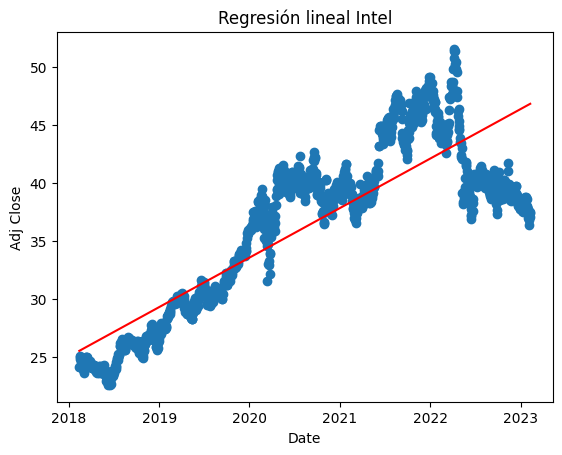

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(RHHBY['Date']).apply(lambda x: x.toordinal())
y = RHHBY['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(RHHBY['Date']), y)
plt.plot(pd.to_datetime(RHHBY['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

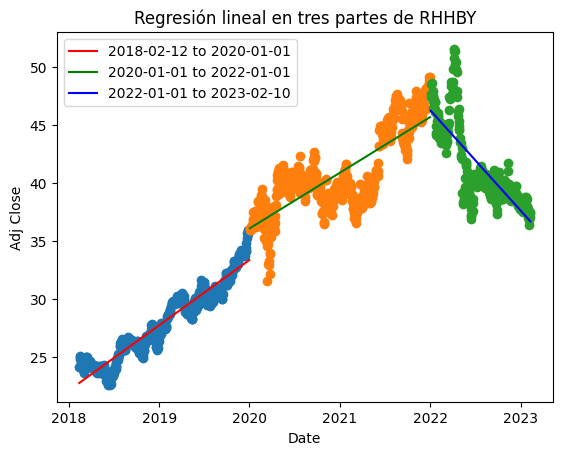

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

RHHBY1 = RHHBY.loc[(RHHBY['Date'] >= '2018-02-12') & (RHHBY['Date'] <= '2020-01-01')]
RHHBY2 = RHHBY.loc[(RHHBY['Date'] > '2020-01-01') & (RHHBY['Date'] <= '2022-01-01')]
RHHBY3 = RHHBY.loc[(RHHBY['Date'] > '2022-01-01') & (RHHBY['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(RHHBY1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(RHHBY2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(RHHBY3['Date']).apply(lambda x: x.toordinal())

y1 = RHHBY1['Adj Close']
y2 = RHHBY2['Adj Close']
y3 = RHHBY3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(RHHBY1['Date']), y1)
plt.plot(pd.to_datetime(RHHBY1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(RHHBY2['Date']), y2)
plt.plot(pd.to_datetime(RHHBY2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(RHHBY3['Date']), y3)
plt.plot(pd.to_datetime(RHHBY3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de RHHBY')
plt.legend()
plt.show()

In [ ]:
RHHBY['Date'] = pd.to_datetime(RHHBY['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = RHHBY.loc[RHHBY['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = RHHBY.loc[RHHBY['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-04-08 00:00:00
Fecha de mínimo Adj Close: 2018-06-08 00:00:00


# Bayer

In [ ]:
BAYRY = pd.read_csv('BAYRY.csv')

In [ ]:
BAYRY.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,29.969999,30.320000,29.910000,30.230000,24.642090,327400
1,2018-02-13,30.080000,30.209999,29.959999,30.150000,24.576878,369600
2,2018-02-14,29.820000,30.760000,29.820000,30.719999,25.041513,230200
3,2018-02-15,30.540001,30.639999,30.200001,30.559999,24.911089,240100
4,2018-02-16,30.420000,30.809999,30.389999,30.730000,25.049667,249400


In [ ]:
BAYRY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,17.659102,17.800207,17.526645,17.677909,16.052162,6.452810e+05
std,4.541825,4.586625,4.522655,4.563399,3.235790,5.951006e+05
min,11.490000,11.560000,11.410000,11.470000,10.932390,1.280000e+05
25%,14.652500,14.732500,14.535000,14.660000,13.918243,3.234250e+05
50%,16.445001,16.575000,16.260000,16.435001,15.252188,4.805000e+05
75%,18.925000,19.020000,18.765000,18.927500,16.930602,7.605250e+05
max,31.450001,32.799999,31.010000,31.670000,26.528177,8.537500e+06


In [ ]:
BAYRY.shape

(1258, 7)

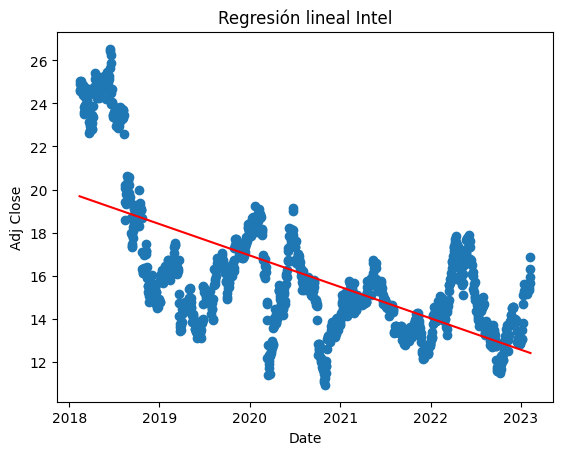

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y


X = pd.to_datetime(BAYRY['Date']).apply(lambda x: x.toordinal())
y = BAYRY['Adj Close']


#ajustar el modelo de regresión lineal


model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)


#obtener los coeficientes de la regresión


coef = model.coef_
intercept = model.intercept_


#graficar la línea de la regresión junto con los puntos originales del DataFrame


plt.scatter(pd.to_datetime(BAYRY['Date']), y)
plt.plot(pd.to_datetime(BAYRY['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

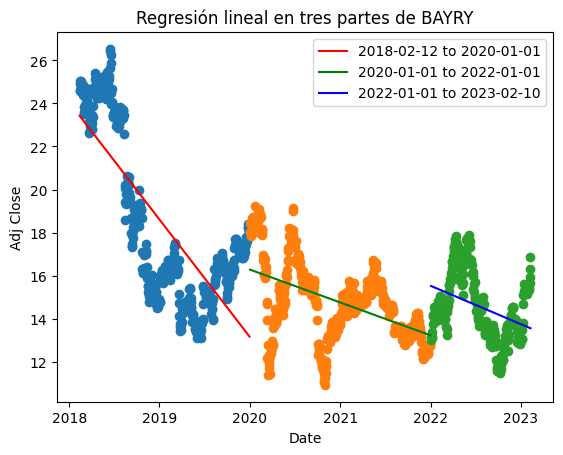

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

BAYRY1 = BAYRY.loc[(BAYRY['Date'] >= '2018-02-12') & (BAYRY['Date'] <= '2020-01-01')]
BAYRY2 = BAYRY.loc[(BAYRY['Date'] > '2020-01-01') & (BAYRY['Date'] <= '2022-01-01')]
BAYRY3 = BAYRY.loc[(BAYRY['Date'] > '2022-01-01') & (BAYRY['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(BAYRY1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(BAYRY2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(BAYRY3['Date']).apply(lambda x: x.toordinal())

y1 = BAYRY1['Adj Close']
y2 = BAYRY2['Adj Close']
y3 = BAYRY3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(BAYRY1['Date']), y1)
plt.plot(pd.to_datetime(BAYRY1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(BAYRY2['Date']), y2)
plt.plot(pd.to_datetime(BAYRY2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(BAYRY3['Date']), y3)
plt.plot(pd.to_datetime(BAYRY3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de BAYRY')
plt.legend()
plt.show()

In [ ]:
BAYRY['Date'] = pd.to_datetime(BAYRY['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = BAYRY.loc[BAYRY['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = BAYRY.loc[BAYRY['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2018-06-14 00:00:00
Fecha de mínimo Adj Close: 2020-10-30 00:00:00


# Pfizer

In [ ]:
PFE = pd.read_csv('PFE.csv')

In [ ]:
PFE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,32.685009,33.083492,32.286530,32.884251,27.416368,38743670
1,2018-02-13,32.798862,33.235294,32.647060,33.149906,27.637852,21559570
2,2018-02-14,32.922199,33.529411,32.789375,33.387096,27.835608,24494749
3,2018-02-15,33.557877,33.899429,33.282730,33.880455,28.246933,22588379
4,2018-02-16,33.927895,34.781784,33.851994,34.402279,28.681988,27659595


In [ ]:
PFE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,40.629897,41.050760,40.204682,40.633937,37.269455,2.774835e+07
std,6.531137,6.671382,6.414042,6.558743,7.631878,1.492928e+07
min,27.286528,28.064516,26.451612,27.030361,24.230362,5.187683e+06
25%,35.213472,35.524195,34.895638,35.163661,31.864277,1.934981e+07
50%,39.469088,39.805502,39.120001,39.493320,34.516928,2.400332e+07
75%,44.707500,45.132500,44.150002,44.709999,43.756149,3.118712e+07
max,60.599998,61.709999,59.830002,61.250000,58.783730,2.301539e+08


In [ ]:
PFE.shape

(1258, 7)

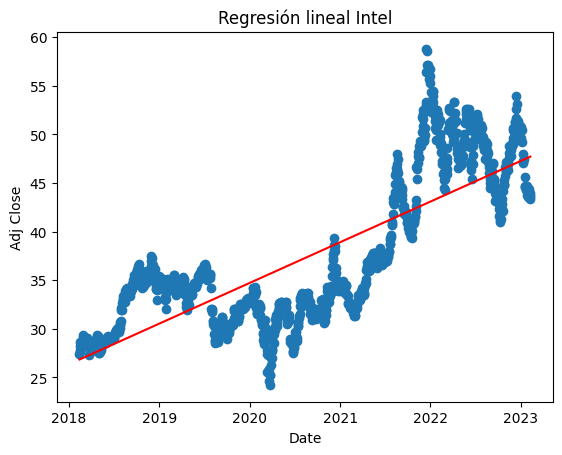

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(PFE['Date']).apply(lambda x: x.toordinal())
y = PFE['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(PFE['Date']), y)
plt.plot(pd.to_datetime(PFE['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

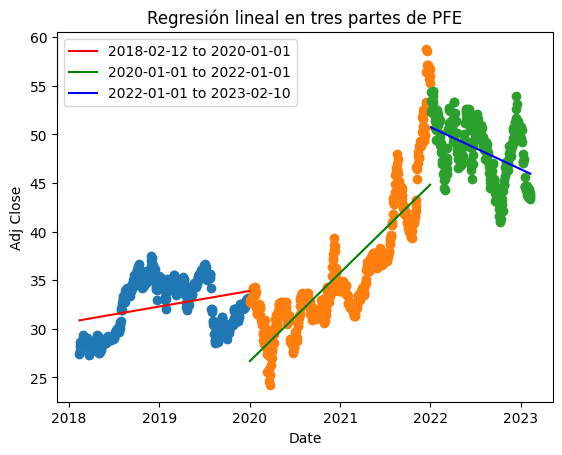

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

PFE1 = PFE.loc[(PFE['Date'] >= '2018-02-12') & (PFE['Date'] <= '2020-01-01')]
PFE2 = PFE.loc[(PFE['Date'] > '2020-01-01') & (PFE['Date'] <= '2022-01-01')]
PFE3 = PFE.loc[(PFE['Date'] > '2022-01-01') & (PFE['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(PFE1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(PFE2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(PFE3['Date']).apply(lambda x: x.toordinal())

y1 = PFE1['Adj Close']
y2 = PFE2['Adj Close']
y3 = PFE3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(PFE1['Date']), y1)
plt.plot(pd.to_datetime(PFE1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(PFE2['Date']), y2)
plt.plot(pd.to_datetime(PFE2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(PFE3['Date']), y3)
plt.plot(pd.to_datetime(PFE3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de PFE')
plt.legend()
plt.show()

In [ ]:
PFE['Date'] = pd.to_datetime(PFE['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = PFE.loc[PFE['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = PFE.loc[PFE['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-12-16 00:00:00
Fecha de mínimo Adj Close: 2020-03-23 00:00:00


# Abbot

In [ ]:
ABT = pd.read_csv('ABT.csv')

In [ ]:
ABT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,57.700001,57.980000,56.880001,57.410000,52.891296,8234200
1,2018-02-13,57.139999,57.790001,56.810001,57.639999,53.103191,5816600
2,2018-02-14,57.320000,58.400002,57.150002,58.279999,53.692825,3728900
3,2018-02-15,58.720001,59.509998,58.330002,59.500000,54.816792,3871900
4,2018-02-16,59.439999,60.540001,59.330002,60.169998,55.434055,7849200


In [ ]:
ABT.shape

(1258, 7)

In [ ]:
ABT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,95.984753,96.926248,95.017758,96.000397,92.547367,5.737496e+06
std,21.607214,21.785800,21.417554,21.582497,22.426687,2.927498e+06
min,57.139999,57.790001,56.810001,57.410000,52.891296,1.067700e+06
25%,78.142500,78.962499,77.462499,78.329998,73.720598,4.107400e+06
50%,98.814999,100.235000,97.955002,99.070000,96.715568,5.078200e+06
75%,113.637499,115.155003,112.615000,113.829998,112.214119,6.437300e+06
max,141.580002,142.600006,140.720001,141.460007,138.498352,4.754020e+07


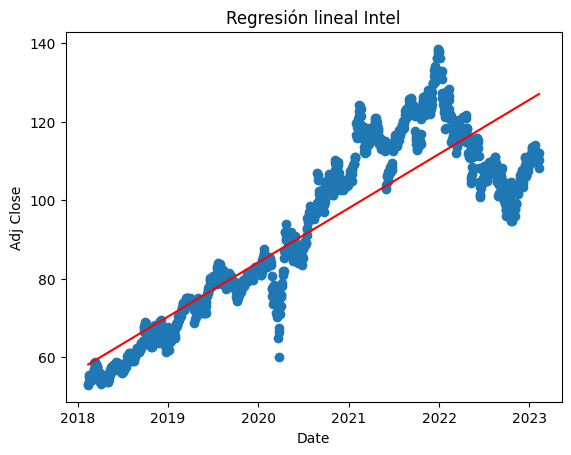

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(ABT['Date']).apply(lambda x: x.toordinal())
y = ABT['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(ABT['Date']), y)
plt.plot(pd.to_datetime(ABT['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

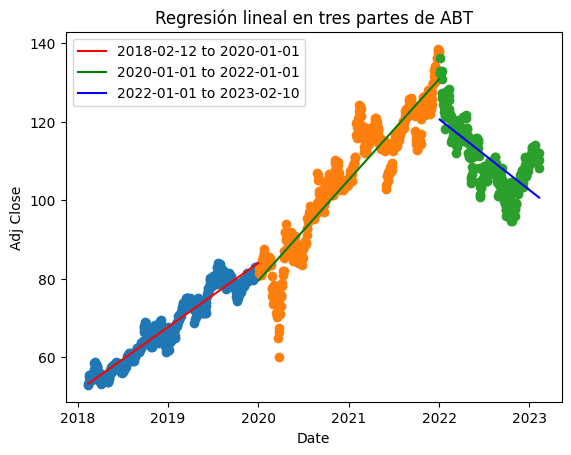

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

ABT1 = ABT.loc[(ABT['Date'] >= '2018-02-12') & (ABT['Date'] <= '2020-01-01')]
ABT2 = ABT.loc[(ABT['Date'] > '2020-01-01') & (ABT['Date'] <= '2022-01-01')]
ABT3 = ABT.loc[(ABT['Date'] > '2022-01-01') & (ABT['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(ABT1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(ABT2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(ABT3['Date']).apply(lambda x: x.toordinal())

y1 = ABT1['Adj Close']
y2 = ABT2['Adj Close']
y3 = ABT3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(ABT1['Date']), y1)
plt.plot(pd.to_datetime(ABT1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(ABT2['Date']), y2)
plt.plot(pd.to_datetime(ABT2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(ABT3['Date']), y3)
plt.plot(pd.to_datetime(ABT3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de ABT')
plt.legend()
plt.show()

In [ ]:
ABT['Date'] = pd.to_datetime(ABT['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = ABT.loc[ABT['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = ABT.loc[ABT['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2021-12-27 00:00:00
Fecha de mínimo Adj Close: 2018-02-12 00:00:00


# Merck

In [ ]:
MRK = pd.read_csv('MRK.csv')

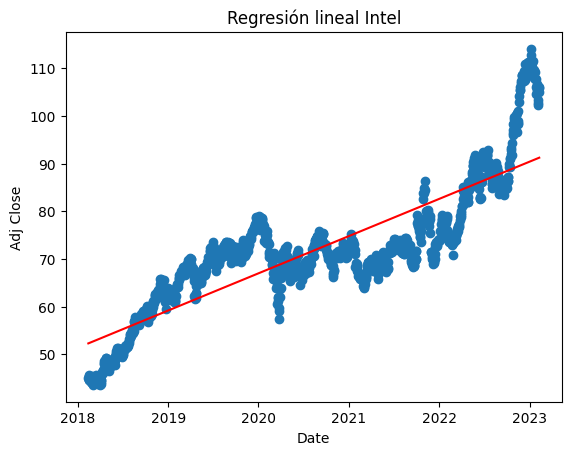

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(MRK['Date']).apply(lambda x: x.toordinal())
y = MRK['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(MRK['Date']), y)
plt.plot(pd.to_datetime(MRK['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

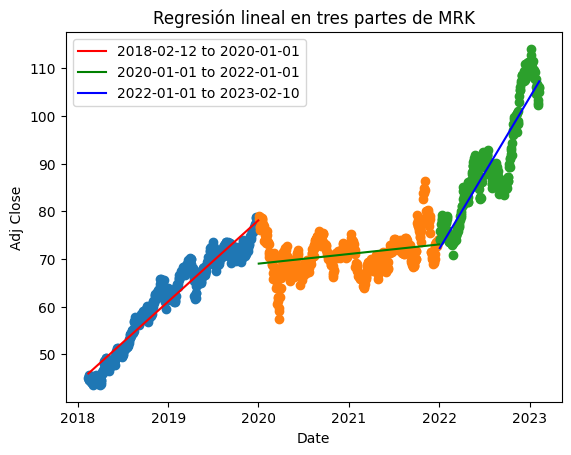

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

MRK1 = MRK.loc[(MRK['Date'] >= '2018-02-12') & (MRK['Date'] <= '2020-01-01')]
MRK2 = MRK.loc[(MRK['Date'] > '2020-01-01') & (MRK['Date'] <= '2022-01-01')]
MRK3 = MRK.loc[(MRK['Date'] > '2022-01-01') & (MRK['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(MRK1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(MRK2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(MRK3['Date']).apply(lambda x: x.toordinal())

y1 = MRK1['Adj Close']
y2 = MRK2['Adj Close']
y3 = MRK3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(MRK1['Date']), y1)
plt.plot(pd.to_datetime(MRK1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(MRK2['Date']), y2)
plt.plot(pd.to_datetime(MRK2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(MRK3['Date']), y3)
plt.plot(pd.to_datetime(MRK3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de MRK')
plt.legend()
plt.show()

In [ ]:
MRK['Date'] = pd.to_datetime(MRK['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = MRK.loc[MRK['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = MRK.loc[MRK['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2023-01-06 00:00:00
Fecha de mínimo Adj Close: 2018-03-01 00:00:00


# GlaxoSmithKline

In [ ]:
GSK = pd.read_csv('GSK.csv')

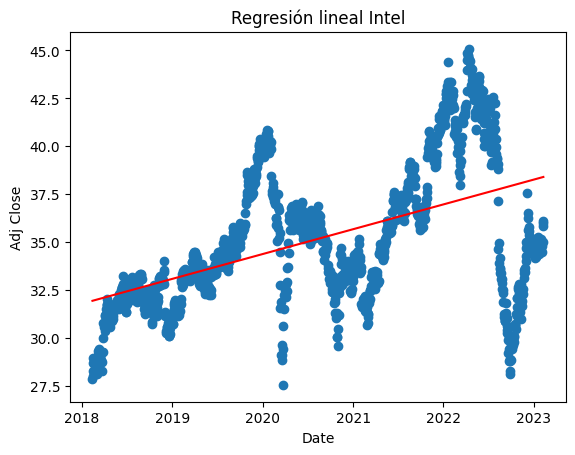

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(GSK['Date']).apply(lambda x: x.toordinal())
y = GSK['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(GSK['Date']), y)
plt.plot(pd.to_datetime(GSK['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

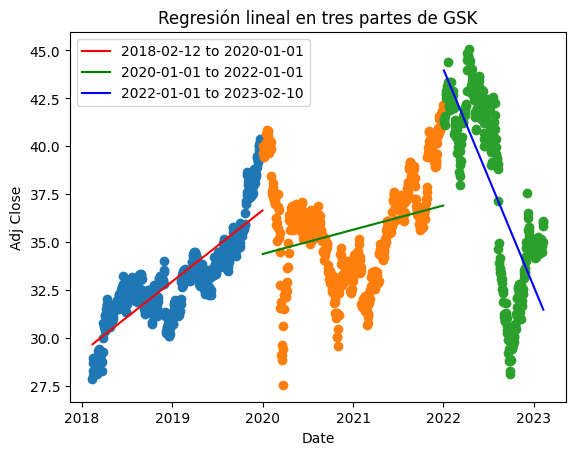

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

GSK1 = GSK.loc[(GSK['Date'] >= '2018-02-12') & (GSK['Date'] <= '2020-01-01')]
GSK2 = GSK.loc[(GSK['Date'] > '2020-01-01') & (GSK['Date'] <= '2022-01-01')]
GSK3 = GSK.loc[(GSK['Date'] > '2022-01-01') & (GSK['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(GSK1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(GSK2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(GSK3['Date']).apply(lambda x: x.toordinal())

y1 = GSK1['Adj Close']
y2 = GSK2['Adj Close']
y3 = GSK3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(GSK1['Date']), y1)
plt.plot(pd.to_datetime(GSK1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(GSK2['Date']), y2)
plt.plot(pd.to_datetime(GSK2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(GSK3['Date']), y3)
plt.plot(pd.to_datetime(GSK3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de GSK')
plt.legend()
plt.show()

In [ ]:
GSK['Date'] = pd.to_datetime(GSK['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = GSK.loc[GSK['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = GSK.loc[GSK['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-04-13 00:00:00
Fecha de mínimo Adj Close: 2020-03-23 00:00:00


# Johnson and Johnson

In [ ]:
JNJ = pd.read_csv('JNJ.csv')

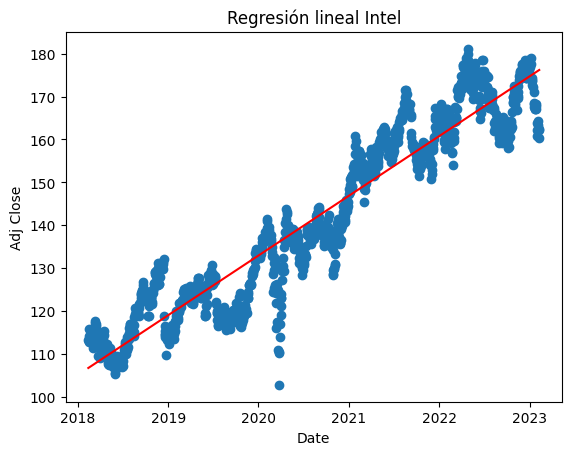

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(JNJ['Date']).apply(lambda x: x.toordinal())
y = JNJ['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión
coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(JNJ['Date']), y)
plt.plot(pd.to_datetime(JNJ['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

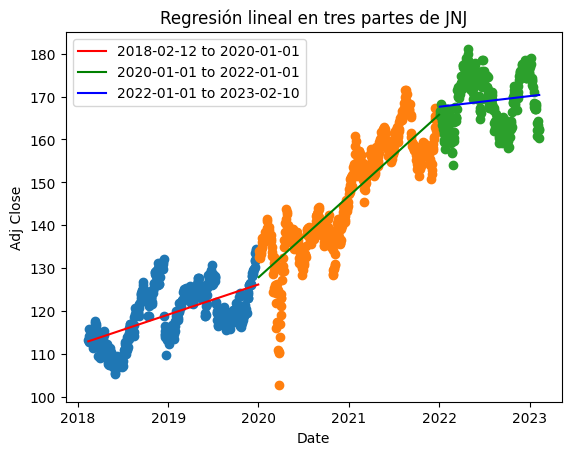

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

JNJ1 = JNJ.loc[(JNJ['Date'] >= '2018-02-12') & (JNJ['Date'] <= '2020-01-01')]
JNJ2 = JNJ.loc[(JNJ['Date'] > '2020-01-01') & (JNJ['Date'] <= '2022-01-01')]
JNJ3 = JNJ.loc[(JNJ['Date'] > '2022-01-01') & (JNJ['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(JNJ1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(JNJ2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(JNJ3['Date']).apply(lambda x: x.toordinal())

y1 = JNJ1['Adj Close']
y2 = JNJ2['Adj Close']
y3 = JNJ3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(JNJ1['Date']), y1)
plt.plot(pd.to_datetime(JNJ1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(JNJ2['Date']), y2)
plt.plot(pd.to_datetime(JNJ2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(JNJ3['Date']), y3)
plt.plot(pd.to_datetime(JNJ3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de JNJ')
plt.legend()
plt.show()

In [ ]:
JNJ['Date'] = pd.to_datetime(JNJ['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = JNJ.loc[JNJ['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = JNJ.loc[JNJ['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-04-25 00:00:00
Fecha de mínimo Adj Close: 2020-03-23 00:00:00


# Novartis

In [ ]:
NVS = pd.read_csv('NVS.csv')

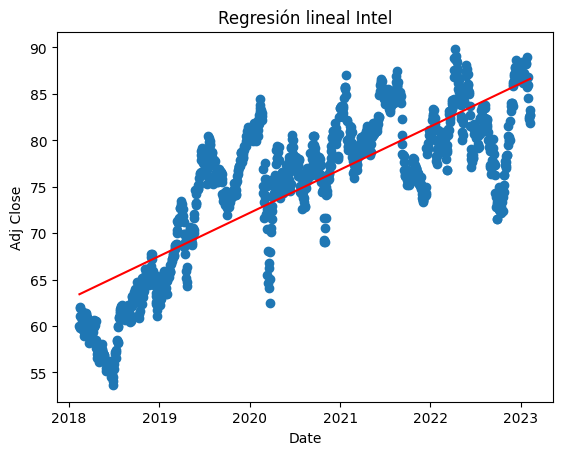

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(NVS['Date']).apply(lambda x: x.toordinal())
y = NVS['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(NVS['Date']), y)
plt.plot(pd.to_datetime(NVS['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

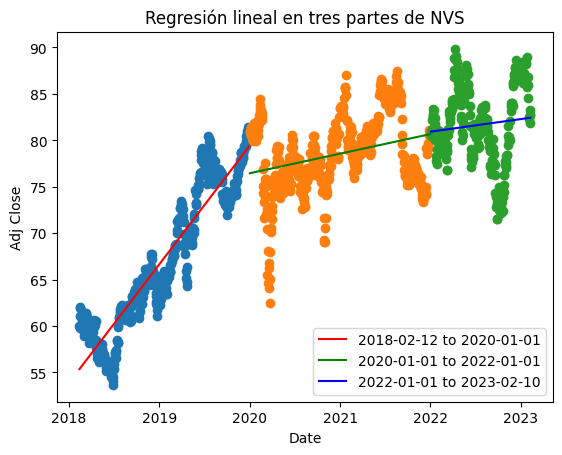

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

NVS1 = NVS.loc[(NVS['Date'] >= '2018-02-12') & (NVS['Date'] <= '2020-01-01')]
NVS2 = NVS.loc[(NVS['Date'] > '2020-01-01') & (NVS['Date'] <= '2022-01-01')]
NVS3 = NVS.loc[(NVS['Date'] > '2022-01-01') & (NVS['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(NVS1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(NVS2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(NVS3['Date']).apply(lambda x: x.toordinal())

y1 = NVS1['Adj Close']
y2 = NVS2['Adj Close']
y3 = NVS3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(NVS1['Date']), y1)
plt.plot(pd.to_datetime(NVS1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(NVS2['Date']), y2)
plt.plot(pd.to_datetime(NVS2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(NVS3['Date']), y3)
plt.plot(pd.to_datetime(NVS3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de NVS')
plt.legend()
plt.show()

In [ ]:
NVS['Date'] = pd.to_datetime(NVS['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = NVS.loc[NVS['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = NVS.loc[NVS['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-04-11 00:00:00
Fecha de mínimo Adj Close: 2018-06-27 00:00:00


# AbbVie

In [ ]:
ABBV = pd.read_csv('ABBV.csv')

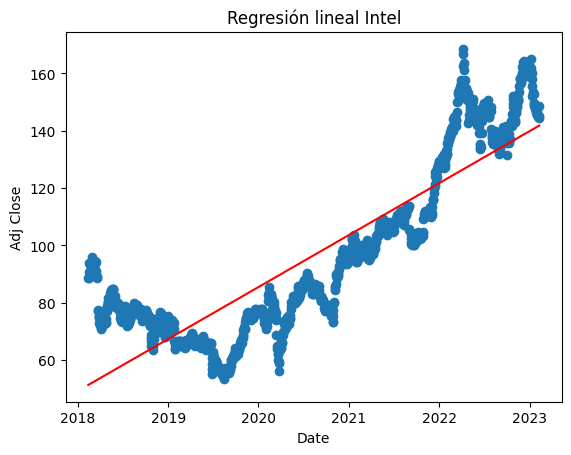

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(ABBV['Date']).apply(lambda x: x.toordinal())
y = ABBV['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(ABBV['Date']), y)
plt.plot(pd.to_datetime(ABBV['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

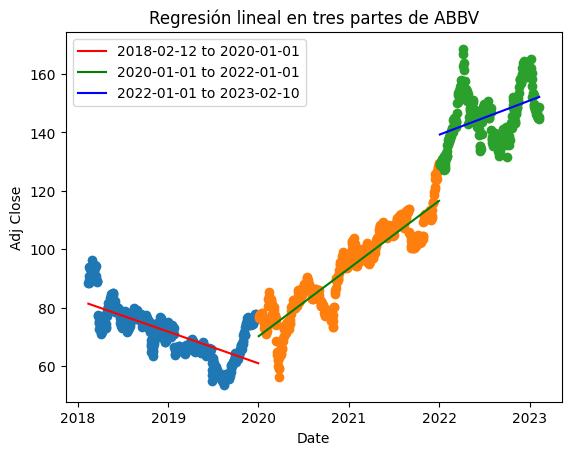

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

ABBV1 = ABBV.loc[(ABBV['Date'] >= '2018-02-12') & (ABBV['Date'] <= '2020-01-01')]
ABBV2 = ABBV.loc[(ABBV['Date'] > '2020-01-01') & (ABBV['Date'] <= '2022-01-01')]
ABBV3 = ABBV.loc[(ABBV['Date'] > '2022-01-01') & (ABBV['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(ABBV1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(ABBV2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(ABBV3['Date']).apply(lambda x: x.toordinal())

y1 = ABBV1['Adj Close']
y2 = ABBV2['Adj Close']
y3 = ABBV3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(ABBV1['Date']), y1)
plt.plot(pd.to_datetime(ABBV1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(ABBV2['Date']), y2)
plt.plot(pd.to_datetime(ABBV2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(ABBV3['Date']), y3)
plt.plot(pd.to_datetime(ABBV3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de ABBV')
plt.legend()
plt.show()

In [ ]:
ABBV['Date'] = pd.to_datetime(ABBV['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = ABBV.loc[ABBV['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = ABBV.loc[ABBV['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-04-08 00:00:00
Fecha de mínimo Adj Close: 2019-08-15 00:00:00


# Sanofi

In [ ]:
SNY = pd.read_csv('SNY.csv')

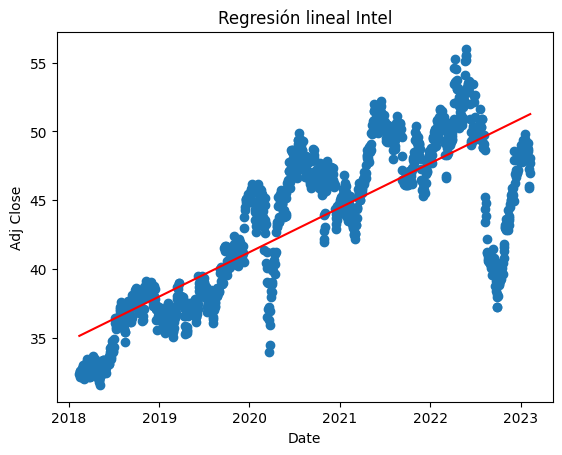

In [ ]:
#REGRESION  

#crear la matriz de características X y la variable objetivo y

X = pd.to_datetime(SNY['Date']).apply(lambda x: x.toordinal())
y = SNY['Adj Close']

#ajustar el modelo de regresión lineal

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

#obtener los coeficientes de la regresión

coef = model.coef_
intercept = model.intercept_

#graficar la línea de la regresión junto con los puntos originales del DataFrame

plt.scatter(pd.to_datetime(SNY['Date']), y)
plt.plot(pd.to_datetime(SNY['Date']), model.predict(X.values.reshape(-1, 1)), color='red')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal Intel')
plt.show()

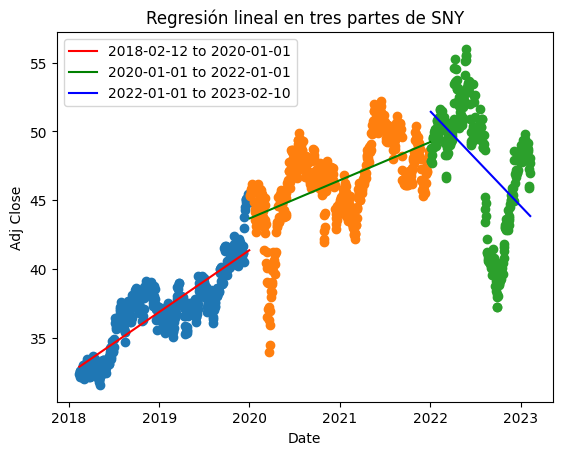

In [ ]:
#REGRESION PARTES
#crear los tres subconjuntos del DataFrame

SNY1 = SNY.loc[(SNY['Date'] >= '2018-02-12') & (SNY['Date'] <= '2020-01-01')]
SNY2 = SNY.loc[(SNY['Date'] > '2020-01-01') & (SNY['Date'] <= '2022-01-01')]
SNY3 = SNY.loc[(SNY['Date'] > '2022-01-01') & (SNY['Date'] <= '2023-02-10')]

#crear las matrices de características X y la variable objetivo y para cada subconjunto

X1 = pd.to_datetime(SNY1['Date']).apply(lambda x: x.toordinal())
X2 = pd.to_datetime(SNY2['Date']).apply(lambda x: x.toordinal())
X3 = pd.to_datetime(SNY3['Date']).apply(lambda x: x.toordinal())

y1 = SNY1['Adj Close']
y2 = SNY2['Adj Close']
y3 = SNY3['Adj Close']

#ajustar el modelo de regresión lineal para cada subconjunto

model1 = LinearRegression()
model1.fit(X1.values.reshape(-1, 1), y1)

model2 = LinearRegression()
model2.fit(X2.values.reshape(-1, 1), y2)

model3 = LinearRegression()
model3.fit(X3.values.reshape(-1, 1), y3)

#obtener los coeficientes de cada regresión

coef1 = model1.coef_
intercept1 = model1.intercept_

coef2 = model2.coef_
intercept2 = model2.intercept_

coef3 = model3.coef_
intercept3 = model3.intercept_

#graficar las líneas de regresión junto con los puntos originales del DataFrame para cada subconjunto

plt.scatter(pd.to_datetime(SNY1['Date']), y1)
plt.plot(pd.to_datetime(SNY1['Date']), model1.predict(X1.values.reshape(-1, 1)), color='red', label='2018-02-12 to 2020-01-01')

plt.scatter(pd.to_datetime(SNY2['Date']), y2)
plt.plot(pd.to_datetime(SNY2['Date']), model2.predict(X2.values.reshape(-1, 1)), color='green', label='2020-01-01 to 2022-01-01')

plt.scatter(pd.to_datetime(SNY3['Date']), y3)
plt.plot(pd.to_datetime(SNY3['Date']), model3.predict(X3.values.reshape(-1, 1)), color='blue', label='2022-01-01 to 2023-02-10')

plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Regresión lineal en tres partes de SNY')
plt.legend()
plt.show()

In [ ]:
SNY['Date'] = pd.to_datetime(SNY['Date'])

#Obtener la fecha en la que se alcanzó el valor máximo de Adj Close

max_date = SNY.loc[SNY['Adj Close'].idxmax()]['Date']

#Obtener la fecha en la que se alcanzó el valor mínimo de Adj Close

min_date = SNY.loc[SNY['Adj Close'].idxmin()]['Date']

print("Fecha de máximo Adj Close:", max_date)
print("Fecha de mínimo Adj Close:", min_date)

Fecha de máximo Adj Close: 2022-05-24 00:00:00
Fecha de mínimo Adj Close: 2018-05-08 00:00:00


# CORRELACION

In [ ]:
farma=pd.DataFrame()
farma["Roche"]=RHHBY["Adj Close"]
farma["Bayer"]=BAYRY["Adj Close"]
farma["Pfizer"]=PFE["Adj Close"]
farma["Abbott"]=ABT["Adj Close"]
farma["Merck"]=MRK["Adj Close"]
farma["GlaxoSmithKline"]=GSK["Adj Close"]
farma["Johnson & Johnson"]=JNJ["Adj Close"]
farma["Novartis"]=NVS["Adj Close"]
farma["AbbVie"]=ABBV["Adj Close"]
farma["Sanofi"]=SNY["Adj Close"]

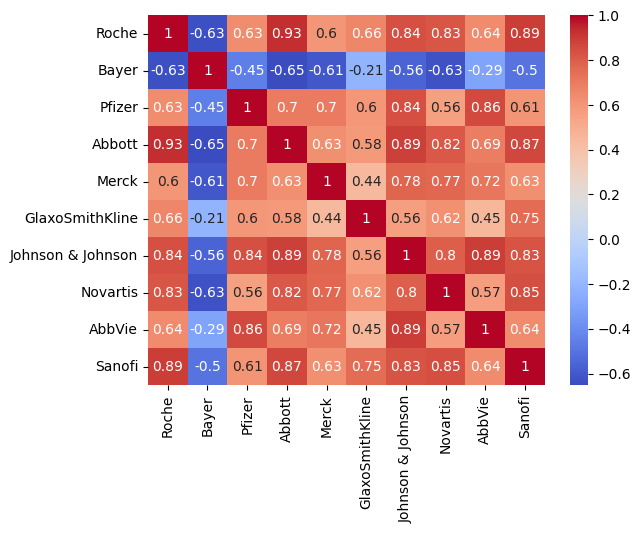

In [ ]:
from numpy.lib import shape_base
# Calcular la matriz de correlación
corr_matrix = farma.corr()

# Crear un mapa de calor de la matriz de correlación
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Mostrar el mapa de calor
plt.show()